In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import cluster

In [9]:
academy = pd.read_csv('./data/academy.csv', encoding='cp949')
academy.head()

,학생번호,국어점수평균,수학점수평균,영어점수평균,과학점수평균,학업집중도
0,1,90,75,85,60,70
1,2,65,90,60,88,80
2,3,45,53,48,50,60
3,4,77,96,62,92,70
4,5,88,89,80,82,90


In [10]:
academy.columns = ['no','kor','math','eng','science','intention']
academy = academy.drop('no', axis=1)
academy.head()

,kor,math,eng,science,intention
0,90,75,85,60,70
1,65,90,60,88,80
2,45,53,48,50,60
3,77,96,62,92,70
4,88,89,80,82,90


In [12]:
print(type(academy), academy.shape, sep='\n')

<class 'pandas.core.frame.DataFrame'>
(52, 5)


In [13]:
np.array(academy)

array([[ 90,  75,  85,  60,  70],
       [ 65,  90,  60,  88,  80],
       [ 45,  53,  48,  50,  60],
       [ 77,  96,  62,  92,  70],
       [ 88,  89,  80,  82,  90],
       [ 90,  92,  90,  96, 100],
       [ 65,  70,  66,  76,  70],
       [ 60,  90,  70,  98,  80],
       [ 46,  56,  43,  55,  60],
       [ 88,  67,  90,  70,  70],
       [ 70,  93,  77,  89,  60],
       [ 99,  80,  95,  70,  80],
       [ 97,  67,  80,  60,  80],
       [ 50,  40,  30,  54,  50],
       [ 90,  77,  92,  60,  70],
       [ 55,  88,  67,  92,  60],
       [ 77,  90,  70,  98,  70],
       [ 90,  89,  80,  92,  90],
       [ 76,  90,  80,  92,  70],
       [ 70,  92,  80,  95,  70],
       [ 76,  75,  70,  82,  80],
       [ 77,  92,  68,  89,  80],
       [ 60,  50,  70,  40,  60],
       [ 54,  70,  56,  72,  60],
       [ 72,  88,  67,  95,  80],
       [ 58,  76,  59,  80,  70],
       [ 88,  60,  76,  58,  60],
       [ 84,  88,  90,  92,  90],
       [ 45,  76,  56,  78,  70],
       [ 76,  

In [14]:
# 자료형 변환
# 데이터프레임 >> np array로
academy_arr = np.array(academy)

In [15]:
academy.columns, academy_arr.shape, academy_arr

(Index(['kor', 'math', 'eng', 'science', 'intention'], dtype='object'),
 (52, 5),
 array([[ 90,  75,  85,  60,  70],
        [ 65,  90,  60,  88,  80],
        [ 45,  53,  48,  50,  60],
        [ 77,  96,  62,  92,  70],
        [ 88,  89,  80,  82,  90],
        [ 90,  92,  90,  96, 100],
        [ 65,  70,  66,  76,  70],
        [ 60,  90,  70,  98,  80],
        [ 46,  56,  43,  55,  60],
        [ 88,  67,  90,  70,  70],
        [ 70,  93,  77,  89,  60],
        [ 99,  80,  95,  70,  80],
        [ 97,  67,  80,  60,  80],
        [ 50,  40,  30,  54,  50],
        [ 90,  77,  92,  60,  70],
        [ 55,  88,  67,  92,  60],
        [ 77,  90,  70,  98,  70],
        [ 90,  89,  80,  92,  90],
        [ 76,  90,  80,  92,  70],
        [ 70,  92,  80,  95,  70],
        [ 76,  75,  70,  82,  80],
        [ 77,  92,  68,  89,  80],
        [ 60,  50,  70,  40,  60],
        [ 54,  70,  56,  72,  60],
        [ 72,  88,  67,  95,  80],
        [ 58,  76,  59,  80,  70],
        

In [16]:
# 모델학습
model = cluster.KMeans(n_clusters=5)  # 5개 군집으로 분류
model.fit(academy_arr)

KMeans(n_clusters=5)

In [17]:
model.labels_

array([1, 3, 4, 3, 0, 0, 2, 3, 4, 1, 3, 0, 1, 4, 1, 2, 3, 0, 3, 3, 3, 3,
       4, 2, 3, 2, 1, 0, 2, 1, 3, 0, 1, 1, 4, 2, 3, 0, 0, 2, 1, 0, 1, 2,
       4, 3, 1, 2, 0, 1, 4, 3])

In [18]:
labels = model.labels_

In [22]:
ldata = academy_arr[labels==0]
print(ldata, ldata[:,2], ldata[:, 3], sep='\n\n')

[[ 88  89  80  82  90]
 [ 90  92  90  96 100]
 [ 99  80  95  70  80]
 [ 90  89  80  92  90]
 [ 84  88  90  92  90]
 [ 88  80  85  88  90]
 [ 93  90  89  91  90]
 [ 92  97  90  89  80]
 [ 90  92  88  94  90]
 [ 97  90  96  90  90]]

[80 90 95 80 90 85 89 90 88 96]

[82 96 70 92 92 88 91 89 94 90]


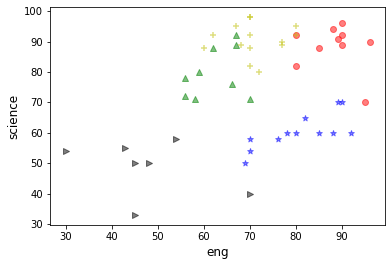

In [24]:
# 시각화 - 그래프 그리기

ldata = academy_arr[labels==0]
plt.scatter(ldata[:,2], ldata[:,3], c='r', alpha=0.5, marker='o')

ldata = academy_arr[labels==1]
plt.scatter(ldata[:,2], ldata[:,3], c='b', alpha=0.5, marker='*')

ldata = academy_arr[labels==2]
plt.scatter(ldata[:,2], ldata[:,3], c='g', alpha=0.5, marker='^')

ldata = academy_arr[labels==3]
plt.scatter(ldata[:,2], ldata[:,3], c='y', alpha=0.5, marker='+')

ldata = academy_arr[labels==4]
plt.scatter(ldata[:,2], ldata[:,3], c='black', alpha=0.5, marker='>')

# 축라벨 설정
plt.xlabel(academy.columns[2], fontsize='large')
plt.ylabel(academy.columns[3], fontsize='large')
plt.show()

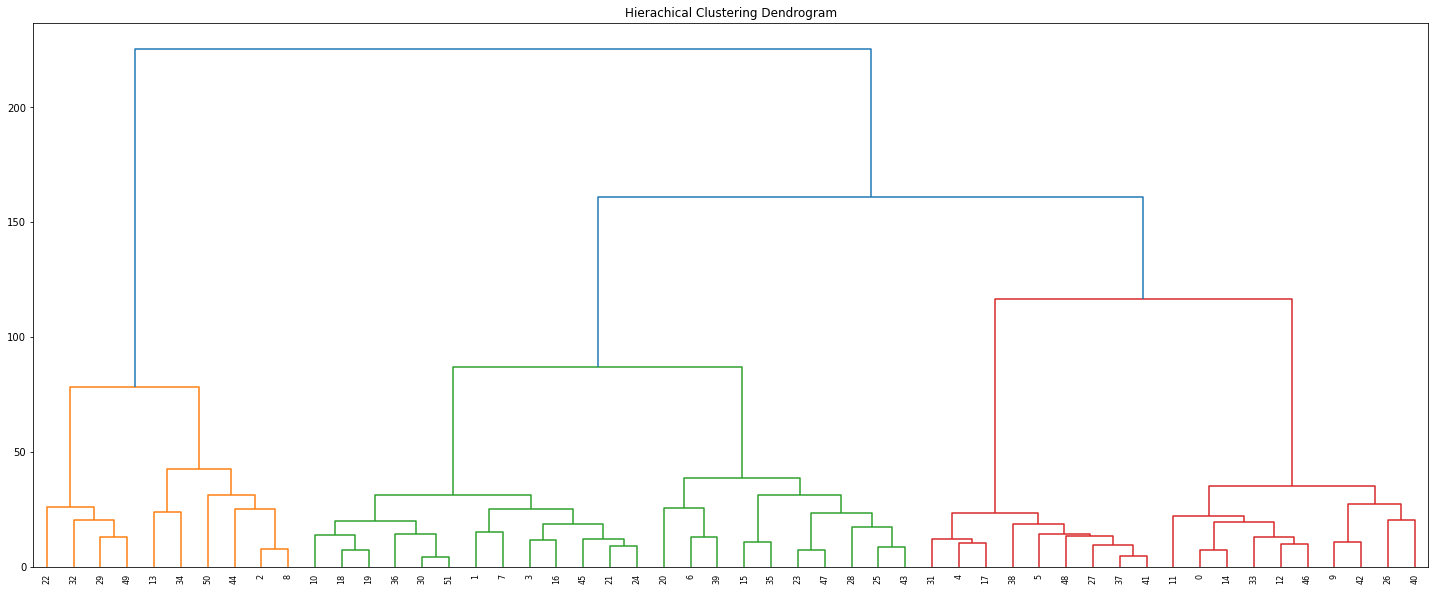

In [25]:
# 덴드로그램

from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(academy_arr, 'ward')

plt.figure(figsize=(25,10))
plt.title('Hierachical Clustering Dendrogram')
# plt.xlabel('iris')
# plt.ylabel('distance')

dendrogram(z, 
           leaf_rotation=90,  # rotation the x axis labels(각도 조절)
           leaf_font_size=8)
plt.show()

In [26]:
# 모델학습
model = cluster.KMeans(n_clusters=5, verbose=1)  # 5개 군집으로 분류
model.fit(academy_arr)

Initialization complete
Iteration 0, inertia 18150.0
Iteration 1, inertia 13028.310954430668
Iteration 2, inertia 12691.769841269845
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 18511.0
Iteration 1, inertia 12670.814178240744
Iteration 2, inertia 12251.132352941177
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 22663.0
Iteration 1, inertia 13547.027851239669
Iteration 2, inertia 12023.839194309967
Iteration 3, inertia 11789.445959595963
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 21895.0
Iteration 1, inertia 12229.306291804545
Iteration 2, inertia 11748.682539682542
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 20362.0
Iteration 1, inertia 13004.241891643711
Iteration 2, inertia 12421.344741202265
Iteration 3, inertia 12220.85854341737
Converged at iteration 3: strict convergence.
Initialization complete
It

KMeans(n_clusters=5, verbose=1)